In [16]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft
import numpy as np

import import_ipynb
import helper_functions

In [17]:
filename = "sounds/windowing_test.wav"

# read data
fs, data = wavfile.read(filename)
print(data.shape)
data = data[:, 0]

(225141, 2)


In [18]:
window_length_ms = 30
window_length = int(window_length_ms*fs/1000)
window_step_ms = window_length_ms/2
window_step = int(window_step_ms*fs/1000)
spectrum_length = 5000
windowing_function = np.sin(np.pi*np.arange(0.5, window_length,1)/window_length)**2
total_length = len(data)

# Inverse function

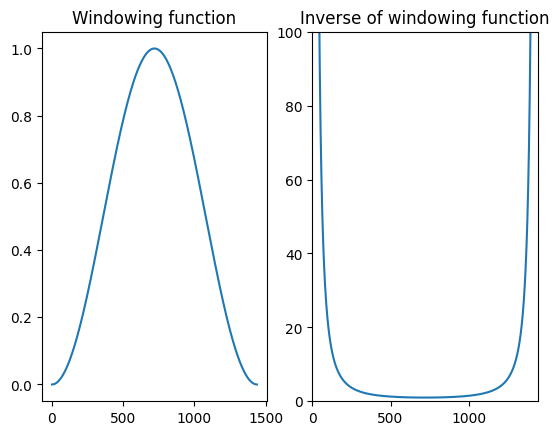

In [19]:
plt.subplot(121)
plt.plot(windowing_function)
plt.title("Windowing function")

plt.subplot(122)
plt.plot(windowing_function**-1)
plt.axis([0, window_length, 0, 100])
plt.title("Inverse of windowing function")
plt.show()

# Overlap add

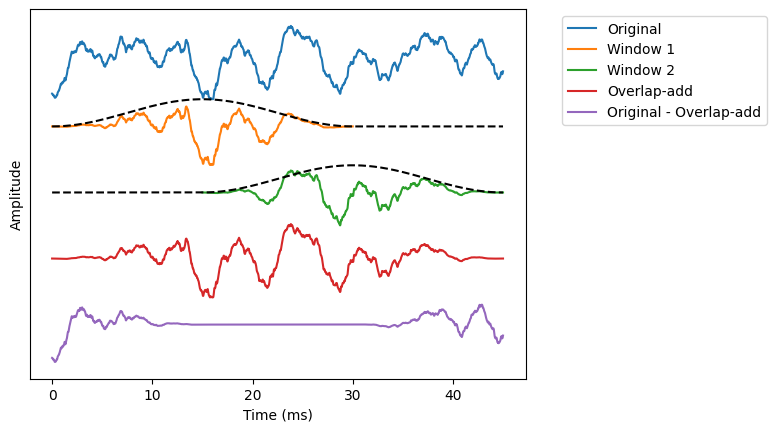

In [20]:
# Choose segment from random position in sample
starting_position1 = np.random.randint(total_length - window_length - window_step)
starting_position2 = starting_position1 + window_step

# Extract data
data_vectorx = data[starting_position1:(starting_position1+window_length+window_step)]
data_vector1 = data[starting_position1:(starting_position1+window_length), ]
data_vector2 = data[starting_position2:(starting_position2+window_length), ]

# Window 1
window1 = data_vector1*windowing_function
time_vector1 = np.linspace(0, window_length_ms, window_length)

# Window 2
window2 = data_vector2*windowing_function
time_vector2 = np.linspace(0, window_length_ms, window_length)+window_step_ms

zero_vector = np.zeros(window_step, )
time_vectorx = np.linspace(0, window_length_ms+window_step_ms, window_length+window_step)
window1x = np.concatenate((window1, zero_vector))
window2x = np.concatenate((zero_vector, window2))

window_fn1 = np.concatenate((windowing_function, zero_vector))
window_fn2 = np.concatenate((zero_vector, windowing_function))
window_scale = np.max(np.abs(data_vectorx))*0.7
window_fn1 *= window_scale
window_fn2 *= window_scale

# Overlap add
window_ola = window1x + window2x

display_shift = np.max(np.abs(data_vector1))*1.7

fig, ax = plt.subplots()
ax.plot(time_vectorx, data_vectorx, label="Original")
ax.plot(time_vector1, window1-display_shift, label="Window 1")
ax.plot(time_vector2, window2-display_shift*2, label="Window 2")
ax.plot(time_vectorx, window_ola-display_shift*3, label="Overlap-add")
ax.plot(time_vectorx, data_vectorx-window_ola-display_shift*4, label="Original - Overlap-add")
ax.plot(time_vectorx, window_fn1-display_shift, "k--")
ax.plot(time_vectorx, window_fn2-display_shift*2, "k--")
ax.legend(bbox_to_anchor=(1.5, 1), loc="upper right")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude")
ax.set_yticks([])
plt.show()

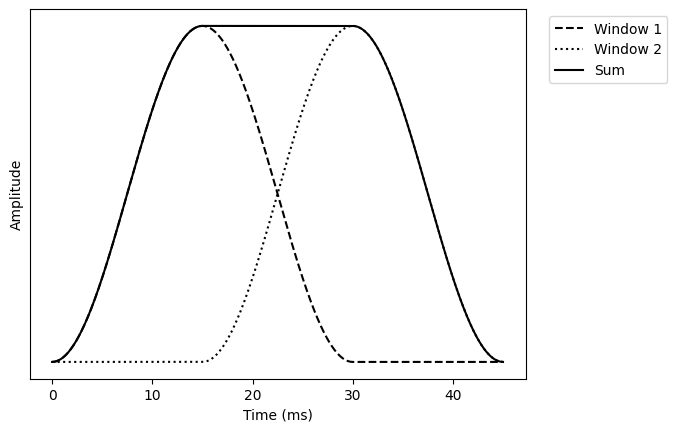

In [21]:
fig, ax = plt.subplots()
ax.plot(time_vectorx, window_fn1, "k--", label="Window 1")
ax.plot(time_vectorx, window_fn2, "k:", label="Window 2")
ax.plot(time_vectorx, window_fn1+window_fn2, 'k', label="Sum")
ax.legend(bbox_to_anchor=(1.3, 1), loc="upper right")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude")
ax.set_yticks([])
plt.show()

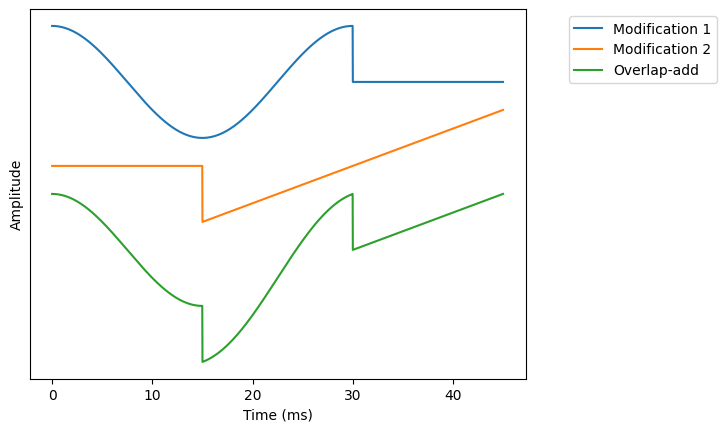

In [26]:
# Choose segment from random position im sample
zero_vector = np.zeros(window_step, )
time_vectorx = np.linspace(0, window_length_ms+window_step_ms, window_length+window_step)

# Modifications
mod1 = np.cos(np.linspace(0, 2*np.pi, window_length))
mod2 = np.linspace(-1, 1, window_length)
mod1x = np.concatenate((mod1, zero_vector))
mod2x = np.concatenate((zero_vector, mod2))

# Overlap-add
window_ola = mod1x + mod2x

display_shift = 1.5

fig, ax = plt.subplots()
ax.plot(time_vectorx, mod1x, label="Modification 1")
ax.plot(time_vectorx, mod2x-display_shift*1, label="Modification 2")
ax.plot(time_vectorx, window_ola-display_shift*2, label="Overlap-add")
ax.legend(bbox_to_anchor=(1.4, 1), loc="upper right")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude")
ax.set_yticks([])
plt.show()

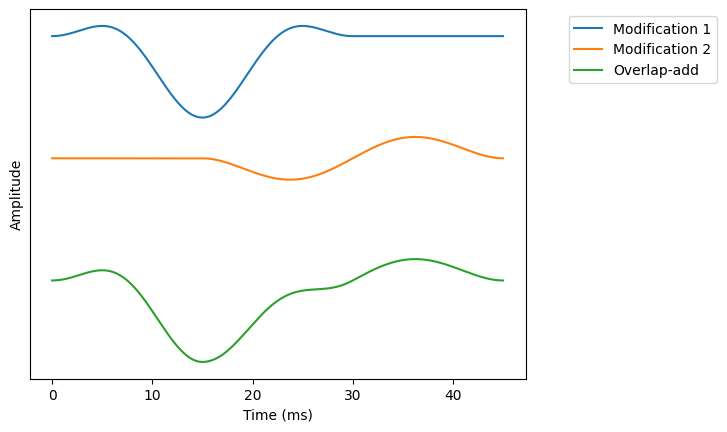

In [27]:
# Choose segment from random position in sample
zero_vector = np.zeros(window_step, )
time_vectorx = np.linspace(0, window_length_ms+window_step_ms, window_length+window_step)

# Modifications
mod1 = np.cos(np.linspace(0, 2*np.pi, window_length)) * windowing_function
mod2 = np.linspace(-1, 1, window_length) * windowing_function
mod1x = np.concatenate((mod1, zero_vector))
mod2x = np.concatenate((zero_vector, mod2))

# Overlap-add
window_ola = mod1x + mod2x
display_shift = 1.5

fig, ax = plt.subplots()
ax.plot(time_vectorx,mod1x,label='Modification 1')
ax.plot(time_vectorx,mod2x-display_shift*1,label='Modification 2')
ax.plot(time_vectorx,window_ola-display_shift*2,label='Overlap-add')
ax.legend(bbox_to_anchor=(1.4, 1),loc='upper right')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
plt.show()

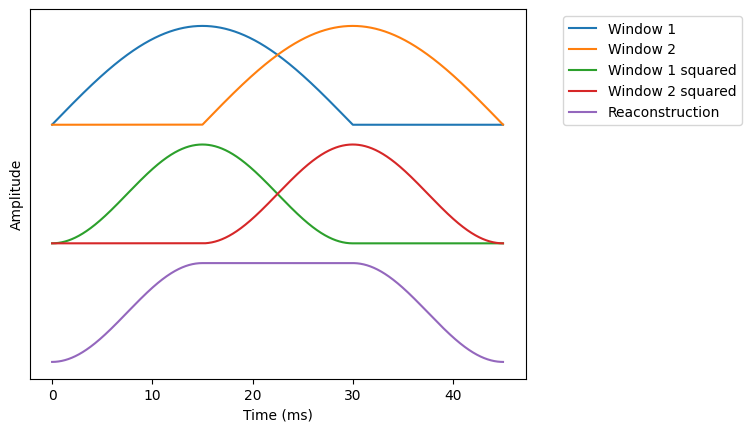

In [28]:
windowing_fn = np.sin(np.pi*np.arange(0.5, window_length, 1)/window_length)

zero_vector = np.zeros(window_step, )
time_vectorx = np.linspace(0, window_length_ms+window_step_ms, window_length+window_step)

win1x = np.concatenate((windowing_fn, zero_vector))
win2x = np.concatenate((zero_vector, windowing_fn))

reconstruction = win1x**2 + win2x**2
display_shift = 1.2

fig, ax = plt.subplots()
ax.plot(time_vectorx, win1x, label="Window 1")
ax.plot(time_vectorx, win2x, label="Window 2")
ax.plot(time_vectorx, win1x**2-display_shift*1, label="Window 1 squared")
ax.plot(time_vectorx, win2x**2-display_shift*1, label="Window 2 squared")
ax.plot(time_vectorx, reconstruction-display_shift*2, label="Reaconstruction")
ax.legend(bbox_to_anchor=(1.45, 1), loc="upper right")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude")
ax.set_yticks([])
plt.show()

